In [54]:
# Den som tränas utan hyper ska tas bort.
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow import keras 
from random import randint

In [55]:
mnist_dataset = tf.keras.datasets.fashion_mnist.load_data()
 
(x_train, y_train), (x_test, y_test) = mnist_dataset
 
print(x_train.shape)
print(y_train.shape)
 
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [56]:
# Scaling 
# To make all data in same range
x_train = x_train / 255.0

x_test = x_test / 255.0

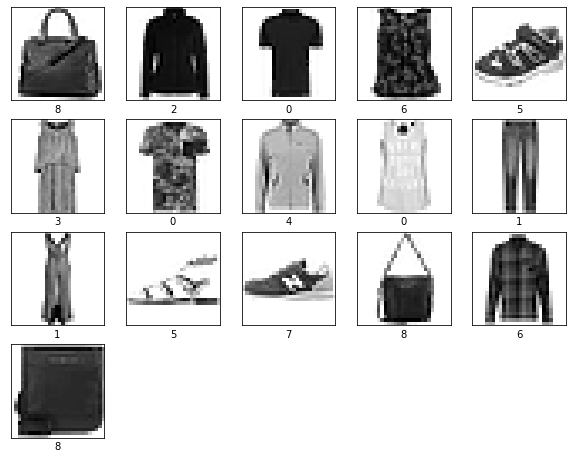

In [57]:
# Plotting 16 random images
plt.figure(figsize=(10,10))
for i in range(16):
    value = randint(0, 60000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[value], cmap=plt.cm.binary)
    plt.xlabel(y_train[value])
plt.show()


In [58]:
# Hyper börja
# Function for selecting hyperparameters

# Learning rate is a tuning parameter that usually takes on low values
# so its interval is between small numbers.

def model_builder(hp):
  # Preparatory
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # .Int will select an integer that is the optimal
  # amount of units.
  # For the second layer we will give it 10 units and also
  # relu activation function.
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))
  # A too large learning rate will result in suboptimal weights
  # and a too small will take longer time to train.
  # We give it a list of options with relatively small values.
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
  # Adam produces solid results.
  # SparseCategoricalCrossentropy should be used when
  # having more than 2 class labels.
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [59]:
# Hyperband selects more efficient ways of performing hyperparameter optimization.
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=25,
)


Reloading Tuner from ./untitled_project/tuner0.json


In [60]:
#stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [61]:
# Searches best hyperparameters.
tuner.search(x_train, y_train, epochs=25, validation_split=0.2)

# Aquires best hyperparameters.
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [62]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7767 - loss: 0.6387 - val_accuracy: 0.8516 - val_loss: 0.4019
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.3848 - val_accuracy: 0.8575 - val_loss: 0.3935
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8732 - loss: 0.3408 - val_accuracy: 0.8731 - val_loss: 0.3663
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8856 - loss: 0.3110 - val_accuracy: 0.8713 - val_loss: 0.3467
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8930 - loss: 0.2870 - val_accuracy: 0.8782 - val_loss: 0.3379
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8976 - loss: 0.2752 - val_accuracy: 0.8827 - val_loss: 0.3217
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9003 - loss: 0.2688 - val_accuracy: 0.8776 - val_loss: 0.3400
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9041 - loss: 0.2552 - 

In [63]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7718 - loss: 0.6462 - val_accuracy: 0.8589 - val_loss: 0.4041
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.3909 - val_accuracy: 0.8696 - val_loss: 0.3686
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8783 - loss: 0.3390 - val_accuracy: 0.8773 - val_loss: 0.3375
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.3129 - val_accuracy: 0.8798 - val_loss: 0.3278
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8923 - loss: 0.2920 - val_accuracy: 0.8804 - val_loss: 0.3358
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.2754 - val_accuracy: 0.8823 - val_loss: 0.3309
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9049 - loss: 0.2533 - val_accuracy: 0.8852 - val_loss: 0.3166
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9068 - loss: 0.2473 - 

In [64]:
# Med hyper 0.8898
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8842 - loss: 0.3910
[test loss, test accuracy]: [0.38486942648887634, 0.8873999714851379]


In [65]:
# Hyper sluta
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [66]:
# Choosing optimizer loss_functions and metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [67]:
# Fitting
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7830 - loss: 0.6206
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8650 - loss: 0.3789
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8785 - loss: 0.3399
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8833 - loss: 0.3121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8887 - loss: 0.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8953 - loss: 0.2843
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9026 - loss: 0.2651
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9047 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9074 - loss: 0.2463
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9107 - loss: 0.2349


In [68]:
# Evaluating
# Får 0.87 utan tuning av hyperparametrar
# Med hyper 0.8898
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - 861us/step - accuracy: 0.8816 - loss: 0.3442

Test accuracy: 0.881600022315979
